In [24]:
import pandas as pd
import numpy as np
titanic=pd.read_csv('train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [25]:
titanic.describe()
# As it is shown in the result, the Age column only has the count of 714 comparing to the count of 891 of others,
# which indicates the miss of some data on Age.
# Since the Age can serves as an important factor to passengers' survival, I am not going to get rid of the whole Age column, 
# but instead trying to fill in the missing values.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Fill in the missing age with the average age.
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
# Since gender may also determines a passenger's survival, it had better to be converted as numeric,
# which will be used in the following correlation analysis. So I convert male as 0 and female as 1.
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female','Sex']=1
titanic['Sex'] = titanic['Sex'].astype('int64')
titanic['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [5]:
# Since I am not sure which variable will determin people's survival,
# I need to figure out the correlation between Survived and other variables first.
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000


According to the correlation table shown above, the three variables may affect the survival are Pclass, Sex and Fare.
I am not considering the other variables because their absolute value of correlation with Survived are less than 0.1.
I think Age is an important factor to passengers' survival although the correlation is low. I will also tap into Age later.
In answering to the question stated at the begining, I think the higher the passenger's class he/ she belong to, the more likely he/ she
will be survived; female are more likey to be resucued; children are more likely be safe; the more expensive the fare is, the higher possibility the passenger will survive.

(<matplotlib.figure.Figure at 0x9780790>,
 OrderedDict([(('3', '0'), (0.0, 0.0, 0.5009692888480767, 0.73319755600814673)), (('3', '1'), (0.0, 0.76545562052427574, 0.5009692888480767, 0.23454437947572432)), (('1', '0'), (0.5464238343026222, 0.0, 0.22038567493112945, 0.35842293906810035)), (('1', '1'), (0.5464238343026222, 0.39068100358422941, 0.22038567493112945, 0.6093189964157707)), (('2', '0'), (0.8122640546882971, 0.0, 0.18773594531170282, 0.51016830294530158)), (('2', '1'), (0.8122640546882971, 0.54242636746143069, 0.18773594531170282, 0.45757363253856947))]))

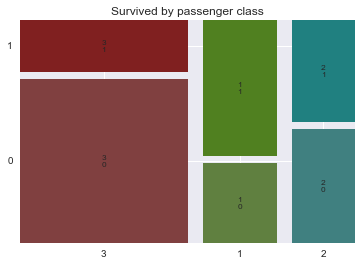

In [6]:
# In order verify my finding, I am going to visualize the data.
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline
mosaic(titanic, ['Pclass','Survived'],gap=0.05,title='Survived by passenger class')
# By the way, what can I do if I want to specify the label, chang 1 to Survived in the plot, for example, and how to add percentage in the plot?

According to the mosaic plot, higher portion of people in higher class (1st and 2nd) survive. In contrast, a much lower portion of 
people belong to the 3rd class survived. Therefore, passenger class can be considered as a factor.


The plot below is modify as suggestions from the review.



In [12]:
Pclass=titanic.groupby("Pclass",as_index=False)["Survived"].mean()
Pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


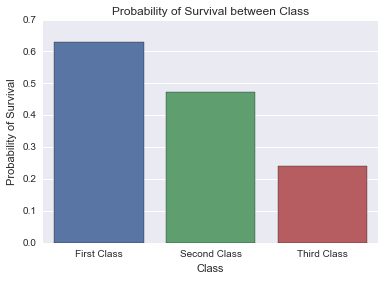

In [13]:
p=sns.barplot(data=Pclass, x="Pclass",y="Survived")
p.set(xlabel="Class",ylabel="Probability of Survival", 
     title="Probability of Survival between Class")
p.set_xticklabels(["First Class","Second Class", "Third Class"])

(<matplotlib.figure.Figure at 0xc1af270>,
 OrderedDict([(('0', '0'), (0.0, 0.0, 0.6167495056383946, 0.78492760105104276)), (('0', '1'), (0.0, 0.81718566556717176, 0.6167495056383946, 0.1828143344328283)), (('1', '0'), (0.6643685532574423, 0.0, 0.3356314467425578, 0.24964043558660368)), (('1', '1'), (0.6643685532574423, 0.28189850010273271, 0.3356314467425578, 0.71810149989726735))]))

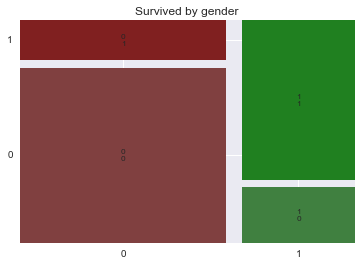

In [47]:
mosaic(titanic, ['Sex','Survived'],gap=0.05,title='Survived by gender')

According to the 'Survived by gender' mosaic plot, we can see that female(1 on the x-axis) are more likely to survive(1 on the y-axis).



The plot below is modify as suggestions from the review.



In [14]:
Sex=titanic.groupby("Sex",as_index=False)["Survived"].mean()
Sex

,Sex,Survived
0,0,0.188908
1,1,0.742038


[<matplotlib.text.Text at 0x9e6e450>, <matplotlib.text.Text at 0x9f87830>]

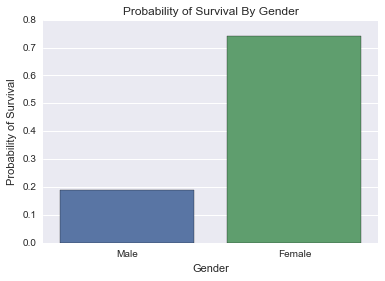

In [15]:
p2=sns.barplot(data=Sex, x="Sex",y="Survived")
p2.set(xlabel="Gender", ylabel="Probability of Survival", 
       title="Probability of Survival By Gender")
p2.set_xticklabels(["Male","Female"])

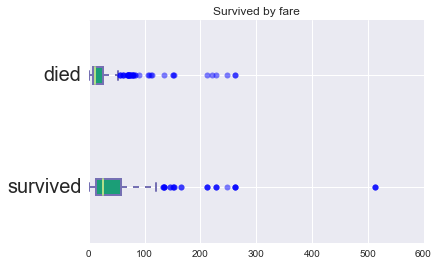

In [51]:
survived=titanic[titanic['Survived']==1]['Fare']
died=titanic[titanic['Survived']==0]['Fare']
to_plot=[survived, died]
bp=plt.boxplot(to_plot,patch_artist=True,vert=0)
for box in bp['boxes']:
    box.set( color='#7570b3', linewidth=2)
    box.set( facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
plt.yticks([1,2],['survived', 'died'], fontsize=20)
plt.title('Survived by fare')



In [56]:
print 'survived: '
print survived.describe()
print 'died: '
print died.describe()

survived: 
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64
died: 
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


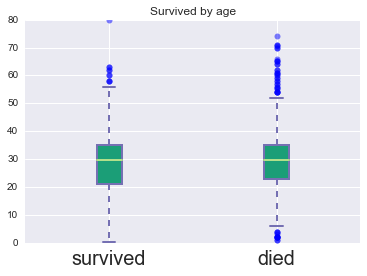

In [58]:
survived=titanic[titanic['Survived']==1]['Age']
died=titanic[titanic['Survived']==0]['Age']
to_plot=[survived, died]
bp=plt.boxplot(to_plot,patch_artist=True)
for box in bp['boxes']:
    box.set( color='#7570b3', linewidth=2)
    box.set( facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
plt.xticks([1,2],['survived', 'died'], fontsize=20)
plt.title('Survived by age')

In [59]:
print 'survived: '
print survived.describe()
print 'died: '
print died.describe()

survived: 
count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64
died: 
count    549.000000
mean      30.415100
std       12.457370
min        1.000000
25%       23.000000
50%       29.699118
75%       35.000000
max       74.000000
Name: Age, dtype: float64


In [18]:
def age_group(age):
    if age<=10:return 'children'
    elif age<=18 and age>10: return 'teenager'
    elif age<=60 and age>18: return 'adult'
    else: return 'elderly'

(<matplotlib.figure.Figure at 0x29025f0>,
 OrderedDict([(('adult', '0'), (0.0, 0.0, 0.6607291553528112, 0.60213282469221441)), (('adult', '1'), (0.0, 0.65276573608461941, 0.6607291553528112, 0.34723426391538065)), (('children', '0'), (0.7252452843850692, 0.0, 0.05792693964736975, 0.3856803797468355)), (('children', '1'), (0.7252452843850692, 0.43631329113924056, 0.05792693964736975, 0.56368670886075956)), (('teenager', '0'), (0.847688353064697, 0.0, 0.06788313239926137, 0.54430379746835456)), (('teenager', '1'), (0.847688353064697, 0.59493670886075956, 0.06788313239926137, 0.4050632911392405)), (('elderly', '0'), (0.9800876144962165, 0.0, 0.01991238550378335, 0.73360184119677796)), (('elderly', '1'), (0.9800876144962165, 0.78423475258918307, 0.01991238550378335, 0.21576524741081707))]))

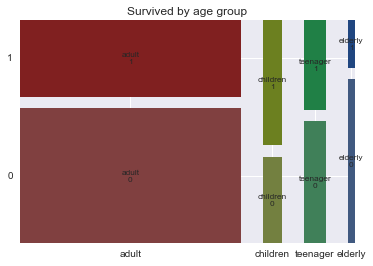

In [19]:
titanic['Age_group'] = titanic['Age'].apply(age_group)
mosaic(titanic, ['Age_group','Survived'],gap=0.08,title='Survived by age group')



Below is the modified plot after the review.



In [21]:
def age_group(age):
    if age<=10:return "Age 0-10"
    elif age<=20 and age>10: return "Age 11-20"
    elif age<=30 and age>20: return "Age 21-30"
    elif age<=40 and age>30: return "Age 31-40"
    elif age<=50 and age>40: return "Age 41-50"
    elif age<=60 and age>50: return "Age 51-60"
    elif age<=70 and age>60: return "Age 61-70"
    else: return "Age >70"
    
titanic['Age_group'] = titanic['Age'].apply(age_group)
Age_group=titanic.groupby("Age_group",as_index=False)["Survived"].mean()
Age_group

,Age_group,Survived
0,Age 0-10,0.593750
1,Age 11-20,0.382609
2,Age 21-30,0.334152
3,Age 31-40,0.445161
4,Age 41-50,0.383721
5,Age 51-60,0.404762
6,Age 61-70,0.235294
7,Age >70,0.200000


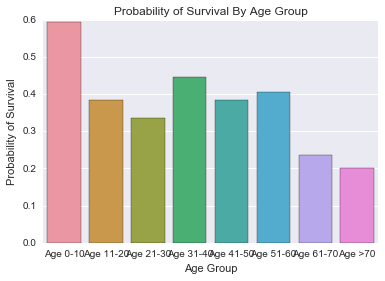

In [23]:
p3=sns.barplot(data=Age_group, x="Age_group", y="Survived")
p3.set(xlabel="Age Group", ylabel="Probability of Survival",
      title="Probability of Survival By Age Group")

Limitation of the analysis:
    1.Filling the null values of age with the mean may be misleading. As it is shown at the tables below, the probability of died(0) for the missing age group(0.7062) is higher than the not null group(0.5934), which indicates that the age values are not missing at random. Hense, filling in the average age value may be bias the result.
    However, replacing the null value with mean will not affect the average age after the replacement.

In [68]:
titanic=pd.read_csv("train.csv")
titanic_null=titanic[titanic["Age"].isnull()]

null_df=titanic_null[["PassengerId","Survived"]].groupby("Survived", as_index=False).count()
null_df["Precentage"]=null_df["PassengerId"]/sum(null_df["PassengerId"])
null_df

,Survived,PassengerId,Precentage
0,0,125,0.706215
1,1,52,0.293785


In [69]:
titanic_notnull=titanic[titanic["Age"].isnull()==False]

notnull_df=titanic_notnull[["PassengerId","Survived"]].groupby("Survived", as_index=False).count()
notnull_df["Precentage"]=notnull_df["PassengerId"]/sum(notnull_df["PassengerId"])
notnull_df

,Survived,PassengerId,Precentage
0,0,424,0.593838
1,1,290,0.406162


2.Depending soly on statistic calculation is not sufficient to support the assumptions, since the data we get may rather represent a special case than a general fact.Therefore, hypothesis test is needed to make inference about the population and justify the data we collected are not special.

3.My analysis didn't consider the Embarked variable, which may also contribute to passengers' survival. Since it datatype is not numeric, I can'r process the data and calculate the correlation between Embarked and Survived. In order to utilize the Embarked values, it is better to convert the Embarked type into categorical number.